# Part 1 - Introduction to GeoEnrichment

## Introduction

The GeoEnrichment module provides a python interface for access the demographic data provided through Business Analyst to enrich study areas, access standard geographies, and create reports. Accessing standard geographies enables retrieving and enriching standard jurisdictional areas such as counties, postal (zip) codes or US Census Block Groups in the United States.

> **Note:** Organizations should review the [data attributions](https://www.esri.com/en-us/legal/terms/data-attributions) and [Master Agreement](https://www.esri.com/content/dam/esrisites/en-us/media/legal/ma-full/ma-full.pdf) to make sure they are in compliance when geoenriching data and making it available to other systems.

### Enriching Study Areas

The GeoEnrichment `enrich` capability adds location intelligence to the data by providing facts about a location or an area. Using GeoEnrichment, you can get information about the people and places in a specific area or within a certain distance or drive time from a location. It enables you to query and use information from a large collection of datasets including population, income, housing, consumer behavior, and the natural environment. 

This enables you to answer questions about locations that you can't answer with maps alone. For example, what kind of people live here? What do people like to do in this area? What are their habits and lifestyles?

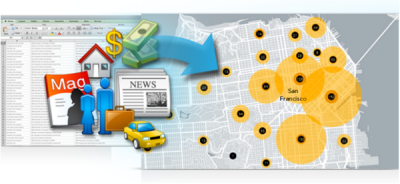

GeoEnrichment makes your analysis more powerful by adding demographic variables in a geographic context. Further, these variables can be accessed at multiple standard geographic resolutions based on the jurisdictional area.

## Getting Started

### GeoEnrichment Source

Utilizing these capabilities requires either a properly configured Web GIS instance and a login with permissions to utilize these capabilities, or a local installation of [ArcGIS Pro with Business Analyst](https://doc.arcgis.com/en/business-analyst/desktop/introduction-to-esri-business-analyst-desktop-install-guide.htm) and at least one country [data pack installed](https://doc.arcgis.com/en/business-analyst/desktop/installing-business-analyst-data.htm). A properly configured Web GIS instance can be either ArcGIS Online or ArcGIS Enterprise. ArcGIS Enterprise can support GeoEnrichment module capabilities by configuring the GeoEnrichment utility service to [connect to ArcGIS Online](https://enterprise.arcgis.com/en/portal/latest/administer/windows/configure-services.htm#ESRI_SECTION2_1E0134BF60A049FFB388265B5A6AAE7F) or a fully configured [ArcGIS Business Analyst Enterprise](https://doc.arcgis.com/en/business-analyst/enterprise/latest/windows/business-analyst-enterprise-overview.htm) deployment.

#### Local GeoEnrichment Source

If utilizing a local GIS to perform enrichment, you need to have an environment configured with ArcGIS Pro with Business Analyst and at least one local data pack. To specify this local source, you must create an `arcgis.gis.GIS` object instance using the `'pro'` keyword. This tells GeoEnrichment to use the locally installed source.

**NOTE:** At the 2.1.0 release, standard geography retrieval and reporting is *not* yet supported with a local source.

In [1]:
from arcgis.gis import GIS

gis = GIS("pro")

#### Web GIS GeoEnrichment Source

If using ArcGIS Online or ArcGIS Enterprise with the GeoEnrichment module, you need to create an `arcgis.gis.GIS` object instance connected to the properly configured Web GIS with a user who has permissions to perform enrichment and create reports.

**NOTE:** GeoEnrichment operations using ArcGIS Online consumes credits. Credits are the currency used across ArcGIS and are consumed for specific transactions. Learn more about credit consumption for GeoEnrichment [here](https://doc.arcgis.com/en/arcgis-online/administer/credits.htm#ESRI_SECTION1_709121D2C7694DCAB9B8592F36F7A5BA).

In [2]:
from arcgis.gis import GIS

gis = GIS(profile="your_online_profile")

## Discovering Countries

Most of the data and jurisdictional areas are organized by country. First we will discover what countries are available. We set the optional `as_df` parameter to `True` in order to have a DataFrame returned as a result.

In [3]:
from arcgis.geoenrichment import get_countries

country_df = get_countries(gis, as_df=True)

country_df

,iso2,iso3,name,alt_name,datasets,default_dataset,continent
0,AL,ALB,Albania,ALBANIA,[ALB_MBR_2021],ALB_MBR_2021,Europe
1,DZ,DZA,Algeria,ALGERIA,[DZA_MBR_2021],DZA_MBR_2021,Africa
2,AD,AND,Andorra,ANDORRA,[AND_MBR_2021],AND_MBR_2021,Europe
3,AO,AGO,Angola,ANGOLA,[AGO_MBR_2021],AGO_MBR_2021,Africa
4,AI,AIA,Anguilla,ANGUILLA,[AIA_MBR_2020],AIA_MBR_2020,North America
...,...,...,...,...,...,...,...
172,VE,VEN,Venezuela,"VENEZUELA, BOLIVARIAN REPUBLIC OF",[VEN_MBR_2021],VEN_MBR_2021,South America
173,VN,VNM,Vietnam,VIET NAM,[VNM_MBR_2022],VNM_MBR_2022,Asia
174,VI,VIR,Virgin Islands,UNITED STATES VIRGIN ISLANDS,[VIR_MBR_2020],VIR_MBR_2020,North America
175,ZM,ZMB,Zambia,ZAMBIA,[ZMB_MBR_2021],ZMB_MBR_2021,Africa


Next, an `arcgis.geoenrichment.Country` object instance can be created to use for subsequent analysis steps.

In [4]:
from arcgis.geoenrichment import Country

country = Country("usa", gis=gis)

country

<Country - United States (GIS @ https://geosaurus.maps.arcgis.com version:10.3)>

## Enrich Example

To provide context, we can apply a quick example:   
A large retailer is evaluating potential sites for a new location. This retailer is interested in using key criteria to evaluate a few candidates. These criteria include competition, traffic, economic feasibility and market potential for the areas surroundinng the potential sites. Utilizing the GeoEnrichment module, the real estate site selection team can include demographic variables such as lifestyle, income, spending and education to understand potential customers in the study areas surrounding the candidate sites.

## Discover Demographic Variables

First, we can discover the variables available with the `enrich_variables` property of the `Country` object. 

In [5]:
ev = country.enrich_variables

ev

,name,alias,data_collection,enrich_name,enrich_field_name,description,vintage,units
0,AGE0_CY,2022 Population Age <1,1yearincrements,1yearincrements.AGE0_CY,F1yearincrements_AGE0_CY,2022 Total Population Age <1 (Esri),2022,count
1,AGE1_CY,2022 Population Age 1,1yearincrements,1yearincrements.AGE1_CY,F1yearincrements_AGE1_CY,2022 Total Population Age 1 (Esri),2022,count
2,AGE2_CY,2022 Population Age 2,1yearincrements,1yearincrements.AGE2_CY,F1yearincrements_AGE2_CY,2022 Total Population Age 2 (Esri),2022,count
3,AGE3_CY,2022 Population Age 3,1yearincrements,1yearincrements.AGE3_CY,F1yearincrements_AGE3_CY,2022 Total Population Age 3 (Esri),2022,count
4,AGE4_CY,2022 Population Age 4,1yearincrements,1yearincrements.AGE4_CY,F1yearincrements_AGE4_CY,2022 Total Population Age 4 (Esri),2022,count
...,...,...,...,...,...,...,...,...
18941,MOEMEDYRMV,2020 Median Year Householder Moved In MOE (ACS...,yearmovedin,yearmovedin.MOEMEDYRMV,yearmovedin_MOEMEDYRMV,2020 Median Year Householder Moved into Unit M...,2016-2020,count
18942,RELMEDYRMV,2020 Median Year Householder Moved In REL (ACS...,yearmovedin,yearmovedin.RELMEDYRMV,yearmovedin_RELMEDYRMV,2020 Median Year Householder Moved into Unit R...,2016-2020,count
18943,ACSOWNER,2020 Owner Households (ACS 5-Yr),yearmovedin,yearmovedin.ACSOWNER,yearmovedin_ACSOWNER,2020 Owner Households (ACS 5-Yr),2016-2020,count
18944,MOEOWNER,2020 Owner Households MOE (ACS 5-Yr),yearmovedin,yearmovedin.MOEOWNER,yearmovedin_MOEOWNER,2020 Owner Households MOE (ACS 5-Yr),2016-2020,count


### Finding Variables

This list of economic variables can be filtered using a few useful patterns. First, any variable ending with `CY` is a current year variable, so we can filter to just current year variables using this pattern.

In [6]:
ev[ev.name.str.lower().str.contains("cy")].reset_index()

,index,name,alias,data_collection,enrich_name,enrich_field_name,description,vintage,units
0,0,AGE0_CY,2022 Population Age <1,1yearincrements,1yearincrements.AGE0_CY,F1yearincrements_AGE0_CY,2022 Total Population Age <1 (Esri),2022,count
1,1,AGE1_CY,2022 Population Age 1,1yearincrements,1yearincrements.AGE1_CY,F1yearincrements_AGE1_CY,2022 Total Population Age 1 (Esri),2022,count
2,2,AGE2_CY,2022 Population Age 2,1yearincrements,1yearincrements.AGE2_CY,F1yearincrements_AGE2_CY,2022 Total Population Age 2 (Esri),2022,count
3,3,AGE3_CY,2022 Population Age 3,1yearincrements,1yearincrements.AGE3_CY,F1yearincrements_AGE3_CY,2022 Total Population Age 3 (Esri),2022,count
4,4,AGE4_CY,2022 Population Age 4,1yearincrements,1yearincrements.AGE4_CY,F1yearincrements_AGE4_CY,2022 Total Population Age 4 (Esri),2022,count
...,...,...,...,...,...,...,...,...,...
1595,18794,VAL1M_CY,2022 Home Value $1 Million-1499999,Wealth,Wealth.VAL1M_CY,Wealth_VAL1M_CY,"2022 Home Value $1,000,000-$1,499,999 (Esri)",2022,count
1596,18795,MEDVAL_CY,2022 Median Home Value,Wealth,Wealth.MEDVAL_CY,Wealth_MEDVAL_CY,2022 Median Home Value (Esri),2022,currency
1597,18796,AVGVAL_CY,2022 Average Home Value,Wealth,Wealth.AVGVAL_CY,Wealth_AVGVAL_CY,2022 Average Home Value (Esri),2022,currency
1598,18797,VALBASE_CY,2022 Home Value Base,Wealth,Wealth.VALBASE_CY,Wealth_VALBASE_CY,2022 Owner Occupied Housing Units by Value Bas...,2022,count


Because we are working with a DataFrame, we can easily filter by key words in the description. Here, we are searching for a metric representing relative diversity. We see there is a variable available, the 2021 Diversity Index. There are three rows that result from our filtering.

Data Collections are groupings of variables. Frequently these groupings can speed up analysis by offering a selection of variables to use for quickly getting started.

In [7]:
ev[
    (ev.name.str.lower().str.contains("cy"))
    & (ev.alias.str.lower().str.contains("diversity"))
].reset_index(drop=True)

,name,alias,data_collection,enrich_name,enrich_field_name,description,vintage,units
0,DIVINDX_CY,2022 Diversity Index,KeyUSFacts,KeyUSFacts.DIVINDX_CY,KeyUSFacts_DIVINDX_CY,2022 Diversity Index (Esri),2022,count
1,DIVINDX_CY,2022 Diversity Index,Policy,Policy.DIVINDX_CY,Policy_DIVINDX_CY,2022 Diversity Index (Esri),2022,count
2,DIVINDX_CY,2022 Diversity Index,raceandhispanicorigin,raceandhispanicorigin.DIVINDX_CY,raceandhispanicorigin_DIVINDX_CY,2022 Diversity Index (Esri),2022,count


Next, we can select a few variables to use for analysis.

In [8]:
analysis_variables = [
    "TOTPOP_CY",  # Population: Total Population (Esri)
    "DIVINDX_CY",  # Diversity Index (Esri)
    "AVGHHSZ_CY",  # Average Household Size (Esri)
    "MEDAGE_CY",  # Age: Median Age (Esri)
    "MEDHINC_CY",  # Income: Median Household Income (Esri)
    "BACHDEG_CY",  # Education: Bachelor"s Degree (Esri)
]

analysis_variables

['TOTPOP_CY',
 'DIVINDX_CY',
 'AVGHHSZ_CY',
 'MEDAGE_CY',
 'MEDHINC_CY',
 'BACHDEG_CY']

### Load Data

We can load the study areas surrounding each location from a Python pickle file. The enrich capability in Business Analyst requires polygon areas to use for [apportioning demographic data](https://developers.arcgis.com/rest/geoenrichment/api-reference/data-apportionment.htm) to the input geographies. The polygons delineating the area to be used for apportioning selected demographic data to each location, these are referred to as *study areas*. While, for this example, we already have study areas created, it is possible to specify parameters for study areas for the enrich tool. This is demonstrated in a later example.

In [9]:
import pandas as pd
from arcgis.features import (
    GeoAccessor,  # adds "spatial" namespace to Pandas DataFrame object
)

itm_id = "379bdcc3f34b4407bef1135956edcf4b"
candidate_df = (
    gis.content.get(itm_id).layers[0].query(out_fields="loc_id", as_df=True)
)

candidate_df

,OBJECTID,loc_id,SHAPE
0,1,Facility 1,"{""rings"": [[[-118.309153568, 34.074037262], [-..."
1,2,Facility 2,"{""rings"": [[[-118.309153568, 34.082122063], [-..."
2,3,Facility 4,"{""rings"": [[[-118.376302328, 34.090880596], [-..."
3,4,Facility 5,"{""rings"": [[[-118.376302328, 34.0911051740001]..."
4,5,Facility 3,"{""rings"": [[[-118.153970313, 34.0778550840001]..."


### Enrich

Finally, we can run the `enrich` method found in the Country class to get data about the study areas using the enrich variables selected above. If you are enriching a study area where you do not know the country you can also use the `enrich` method found outside of the Country class.

In [11]:
enrich_df = country.enrich(candidate_df, enrich_variables=analysis_variables)

enrich_df

,objectid,loc_id,source_country,aggregation_method,population_to_polygon_size_rating,apportionment_confidence,has_data,medage_cy,totpop_cy,avghhsz_cy,bachdeg_cy,medhinc_cy,divindx_cy,SHAPE
0,1,Facility 1,USA,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,33.7,441440.0,2.61,61913.0,50088.0,88.4,"{""rings"": [[[-118.309153568, 34.07403726200000..."
1,2,Facility 2,USA,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,34.3,454965.0,2.52,72400.0,52284.0,88.7,"{""rings"": [[[-118.309153568, 34.082122063], [-..."
2,3,Facility 4,USA,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,38.4,224109.0,2.23,58747.0,93112.0,82.2,"{""rings"": [[[-118.376302328, 34.09088059599999..."
3,4,Facility 5,USA,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,38.5,221385.0,2.20,58655.0,94416.0,81.5,"{""rings"": [[[-118.376302328, 34.0911051740001]..."
4,5,Facility 3,USA,BlockApportionment:US.BlockGroups;PointsLayer:...,2.191,2.576,1,31.4,230872.0,3.51,16674.0,55399.0,71.2,"{""rings"": [[[-118.15397031299999, 34.077855084..."


The response includes metadata related to how the enrichment was performed. However, if we are only interested in the actual demographic columns added, we can filter to just these using the available enrich variable names.

In [12]:
# get just the enrich columns
enrich_cols = [c for c in enrich_df if c in ev.name.str.lower().values]

# combine the enrich columns with a few others we want to keep
keep_cols = ["loc_id"] + enrich_cols + ["SHAPE"]

# filter the enrich data frame to just these columns
enrich_df = enrich_df.loc[:, keep_cols].set_index("loc_id")

# re-enable spatial awareness
enrich_df.spatial.set_geometry("SHAPE")

enrich_df

,medage_cy,totpop_cy,avghhsz_cy,bachdeg_cy,medhinc_cy,divindx_cy,SHAPE
loc_id,,,,,,,
Facility 1,33.7,441440.0,2.61,61913.0,50088.0,88.4,"{""rings"": [[[-118.309153568, 34.07403726200000..."
Facility 2,34.3,454965.0,2.52,72400.0,52284.0,88.7,"{""rings"": [[[-118.309153568, 34.082122063], [-..."
Facility 4,38.4,224109.0,2.23,58747.0,93112.0,82.2,"{""rings"": [[[-118.376302328, 34.09088059599999..."
Facility 5,38.5,221385.0,2.20,58655.0,94416.0,81.5,"{""rings"": [[[-118.376302328, 34.0911051740001]..."
Facility 3,31.4,230872.0,3.51,16674.0,55399.0,71.2,"{""rings"": [[[-118.15397031299999, 34.077855084..."


## Evaluate Results

An extremely effective starting point for analysis is simply visualizing the results. Here, we are using `matplotlib` to visualize the differencees between the locations based on the enriched data.

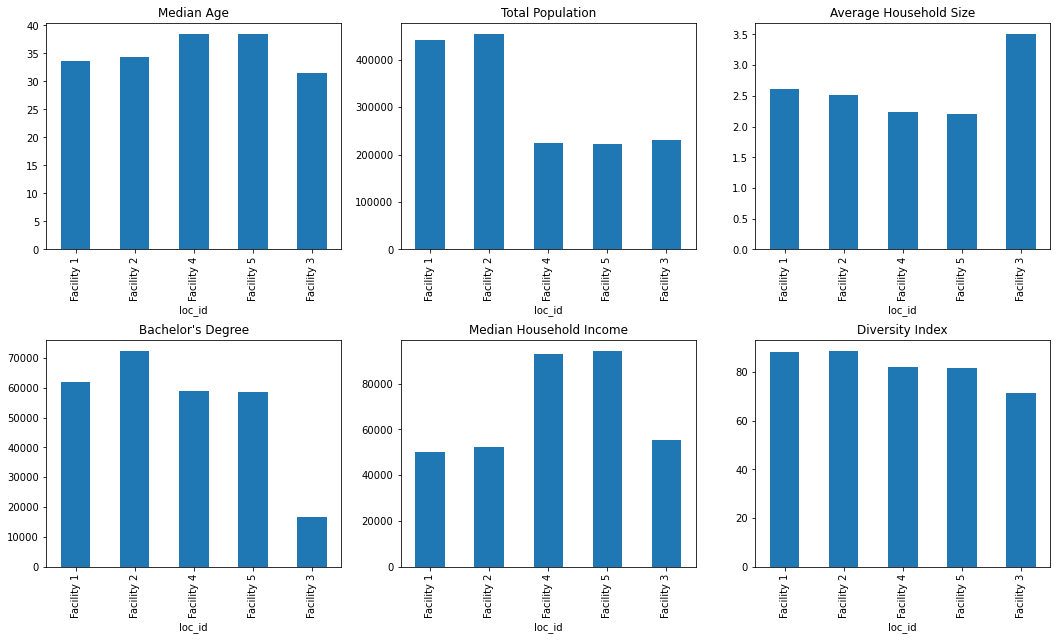

In [13]:
# this is due to a deprication warning inside matplotlib
import warnings

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

fig, axs = plt.subplots(2, 3)
fig.set_figheight(10.0)
fig.set_figwidth(18.0)
fig.subplots_adjust(hspace=0.4)

plt.sca(axs[0, 0])
_ = enrich_df.medage_cy.plot(title="Median Age", kind="bar")

plt.sca(axs[0, 1])
_ = enrich_df.totpop_cy.plot(title="Total Population", kind="bar")

plt.sca(axs[0, 2])
_ = enrich_df.avghhsz_cy.plot(title="Average Household Size", kind="bar")

plt.sca(axs[1, 0])
_ = enrich_df.bachdeg_cy.plot(title="Bachelor's Degree", kind="bar")

plt.sca(axs[1, 1])
_ = enrich_df.medhinc_cy.plot(title="Median Household Income", kind="bar")

plt.sca(axs[1, 2])
_ = enrich_df.divindx_cy.plot(title="Diversity Index", kind="bar")

Facility 1 and facility 2 have higher populations, and are diverse with less income. Facility 3 is far younger with larger households, less education, and have lower incomes. Facility 4 and facility 5 are older, more educated and have a higher income.

If interested in opening a discount department store, facility 2 is the most attractive location with facility 1 as a close second. The diversity and lower income can allow us to conclude that people will buy at lower prices.

If interested in opening a quick service restaurant, facility 3 may be the best option to meet the needs of a young, busy and price conscious population.

Obviously, depending on the key characteristics of the business looking for a new location, the key demographic indicators will be different. Using geoenrichment, paired with the ArcGIS API for Python, enables extremely quick access to demographic variables for informed decision making.

## Conclusion  
  
    
GeoEnrichment makes any location data intelligent by providing facts about the location. In this part of the Geoenrichment guide series, you have seen a high-level example of how `arcgis.geoenrichment.Country` country can be used to `enrich` a dataset with various socio-demographic features, and also an introduction of the different ways in which data can be enriched. In the subsequent pages, you will learn about:
1. Enriching Study Areas (explains where to enrich)
2. Exploring Named Statistical Areas (explains where to enrich continued)
3. Enriching Data Collections and Spatially Enabled Dataframe (explains what datasets/variables to enrich with)
4. Generating Reports
5. Standard Geography Queries